<a href="https://colab.research.google.com/github/Rabia-creator/RabiaSaqib_DL_assignments_Q2_batch35/blob/main/Ionosphere_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import modules
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import scale, LabelEncoder

In [ ]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv("ionosphere.csv") 

Saving ionosphere.csv to ionosphere (1).csv


In [ ]:
df.shape

(351, 35)

In [ ]:
df.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,-0.06302,0.00000,0.00000,-0.04572,-0.15540,-0.00343,-0.10196,-0.11575,-0.05414,0.01838,0.03669,0.01519,0.00888,0.03513,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,0.79766,-0.47929,0.78225,-0.50764,0.74628,-0.61436,0.57945,-0.68086,0.37852,-0.73641,0.36324,-0.76562,0.31898,-0.79753,0.22792,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,0.92570,-0.43569,0.94510,-0.40668,0.90392,-0.46381,0.98305,-0.35257,0.84537,-0.66020,0.75346,-0.60589,0.69637,-0.64225,0.85106,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,-0.45663,-0.38172,0.00000,0.00000,-0.33656,0.38602,-0.37133,0.15018,0.63728,0.22115,0.00000,0.00000,0.00000,0.00000,-0.14803,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


In [ ]:
#checking for null values
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [ ]:
#droping unneceasary columns
df=df.drop('feature2',axis=1)

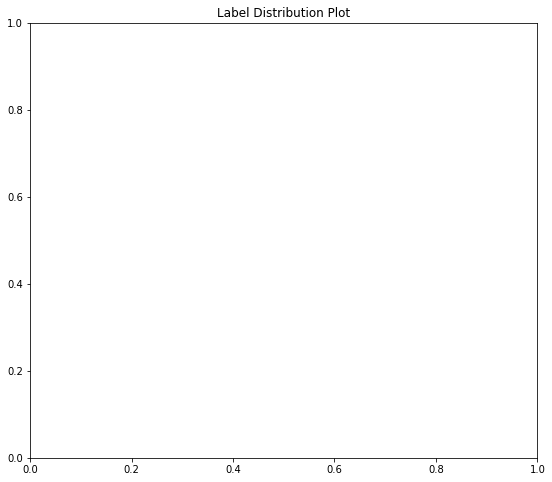

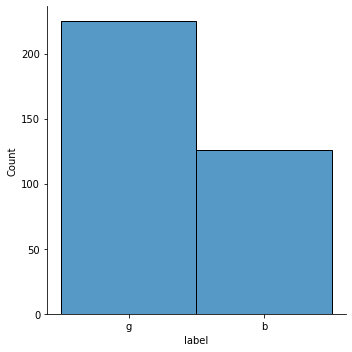

In [ ]:
## visualizing the data
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Label Distribution Plot')
sns.displot(df.label)

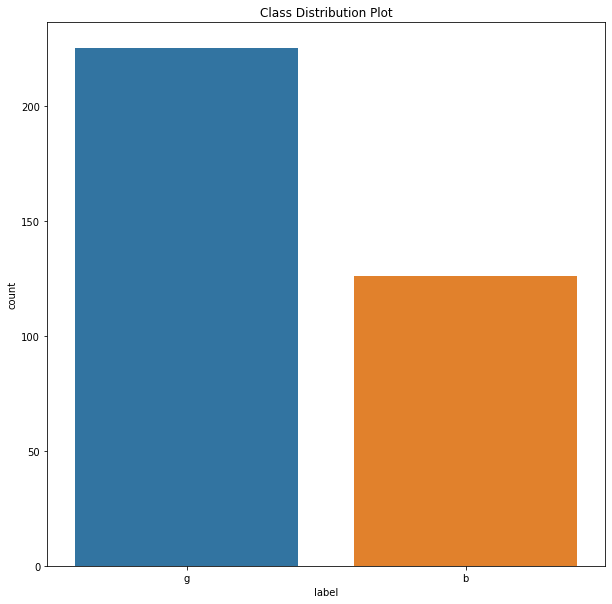

In [ ]:
# class distribution plot
plt.figure(figsize=(10,10))
plt.title('Class Distribution Plot')
sns.countplot(x='label',data=df)

In [ ]:
#shuffle data
df = df.sample(frac=1)
df

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
288,1,0.87111,0.04326,0.79946,0.18297,0.99009,0.29292,0.89455,-0.08337,0.88598,-0.02028,0.90446,-0.26724,0.89410,0.19964,0.88644,-0.04642,0.84452,-0.00991,0.97882,-0.34024,0.78954,-0.25101,0.86661,-0.09193,0.85967,-0.02908,0.78774,-0.04101,0.75935,0.21812,0.88238,0.09193,1
259,1,0.68317,0.05375,0.84803,0.00202,0.84341,0.00301,0.84300,0.09901,0.75813,0.04102,0.81892,0.00585,0.80738,0.00673,0.80622,-0.12447,0.77935,-0.03536,0.76365,0.00909,0.74635,0.00978,0.79632,-0.04243,0.70824,0.01096,0.62235,0.11598,0.66624,0.01190,0.64407,0.01227,1
148,1,0.85271,0.05426,1.00000,0.08069,1.00000,1.00000,0.91473,-0.00775,0.83721,0.03876,1.00000,0.27153,1.00000,1.00000,0.81395,0.04651,0.90698,0.11628,1.00000,0.50670,1.00000,-1.00000,0.80620,0.03876,1.00000,0.71613,0.84496,0.06977,1.00000,0.87317,1.00000,1.00000,0
252,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,1.00000,0.00000,0.00000,1.00000,0.37333,-0.12000,-0.12000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,1.00000,0.22667,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
281,1,0.94331,0.19959,0.96132,0.40803,0.80514,0.56569,0.56687,0.70830,0.41836,0.83230,0.14939,0.89489,0.05167,0.93682,-0.24742,0.83939,-0.42811,0.75554,-0.50251,0.62563,-0.65515,0.50428,-0.68851,0.30912,-0.77097,0.15619,-0.75406,-0.04399,-0.75199,-0.17921,-0.66932,-0.34367,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,0
85,1,0.39179,-0.06343,0.97464,0.04328,1.00000,1.00000,0.35821,0.15299,0.54478,0.13060,0.61567,-0.82090,0.57836,0.67910,0.66791,-0.10448,0.46642,-0.11567,0.65574,0.14792,0.83209,0.45522,0.47015,0.16418,0.49309,0.14630,0.32463,-0.02612,0.39118,0.13521,0.34411,0.12755,0
157,1,0.47090,0.22751,0.42328,0.33598,0.25661,0.47619,0.01852,0.49471,-0.02116,0.53968,-0.34127,0.31217,-0.41270,0.32540,-0.51587,0.06878,-0.50000,-0.11640,-0.14815,-0.14550,-0.14815,-0.38095,-0.23280,0.00265,0.03574,-0.31739,0.15873,-0.21693,0.24868,-0.24339,0.26720,0.04233,1
159,1,0.94333,0.38574,0.48263,0.64534,0.21572,0.77514,-0.55941,0.64899,-0.73675,0.42048,-0.76051,0.00000,-0.62706,-0.31079,-0.38391,-0.62157,-0.12797,-0.69287,0.49909,-0.63620,0.71481,-0.37660,0.73857,-0.05484,0.60098,0.30384,0.45521,0.60512,0.02742,0.54479,-0.21572,0.50457,1


In [ ]:
# one hot encoding labels
encoding= {'g':1,"b":0}
df.label.replace(encoding,inplace=True)

In [ ]:
#splitting the dataset into training and testing data
train_data=df.iloc[:210,:]
train_data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
288,1,0.87111,0.04326,0.79946,0.18297,0.99009,0.29292,0.89455,-0.08337,0.88598,-0.02028,0.90446,-0.26724,0.89410,0.19964,0.88644,-0.04642,0.84452,-0.00991,0.97882,-0.34024,0.78954,-0.25101,0.86661,-0.09193,0.85967,-0.02908,0.78774,-0.04101,0.75935,0.21812,0.88238,0.09193,1
259,1,0.68317,0.05375,0.84803,0.00202,0.84341,0.00301,0.84300,0.09901,0.75813,0.04102,0.81892,0.00585,0.80738,0.00673,0.80622,-0.12447,0.77935,-0.03536,0.76365,0.00909,0.74635,0.00978,0.79632,-0.04243,0.70824,0.01096,0.62235,0.11598,0.66624,0.01190,0.64407,0.01227,1
148,1,0.85271,0.05426,1.00000,0.08069,1.00000,1.00000,0.91473,-0.00775,0.83721,0.03876,1.00000,0.27153,1.00000,1.00000,0.81395,0.04651,0.90698,0.11628,1.00000,0.50670,1.00000,-1.00000,0.80620,0.03876,1.00000,0.71613,0.84496,0.06977,1.00000,0.87317,1.00000,1.00000,0
252,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,1.00000,0.00000,0.00000,1.00000,0.37333,-0.12000,-0.12000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,1.00000,0.22667,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
281,1,0.94331,0.19959,0.96132,0.40803,0.80514,0.56569,0.56687,0.70830,0.41836,0.83230,0.14939,0.89489,0.05167,0.93682,-0.24742,0.83939,-0.42811,0.75554,-0.50251,0.62563,-0.65515,0.50428,-0.68851,0.30912,-0.77097,0.15619,-0.75406,-0.04399,-0.75199,-0.17921,-0.66932,-0.34367,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1,0.88116,0.27475,0.72125,0.42881,0.61559,0.63662,0.38825,0.90502,0.09831,0.96128,-0.20097,0.89200,-0.35737,0.77500,-0.65114,0.62210,-0.78768,0.45535,-0.81856,0.19095,-0.83943,-0.08079,-0.78334,-0.26356,-0.67557,-0.45511,-0.54732,-0.60858,-0.30512,-0.66700,-0.19312,-0.75597,1
289,1,0.74916,0.02549,0.98994,0.09792,0.75855,0.12877,0.74313,-0.09188,0.95842,0.02482,0.97921,-0.00469,0.96110,0.10195,0.91482,0.03756,0.71026,0.02683,0.81221,-0.08048,1.00000,0.00000,0.71764,-0.01207,0.82271,0.02552,0.72435,-0.01073,0.90409,0.11066,0.72837,0.02750,1
158,1,0.08696,0.00686,0.13959,-0.04119,0.10526,-0.08238,0.12586,-0.06178,0.23341,-0.01144,0.12357,0.07780,0.14645,-0.13501,0.29062,-0.04805,0.18993,0.07323,0.11670,0.00000,0.11213,-0.00229,0.15103,-0.10297,0.08467,0.01373,0.11213,-0.06636,0.09611,-0.07323,0.11670,-0.06865,0
279,1,0.97905,0.15810,0.90112,0.35237,0.82039,0.48561,0.71760,0.64888,0.58827,0.73743,0.40349,0.83156,0.25140,0.84804,0.04700,0.85475,-0.12193,0.79749,-0.26180,0.80754,-0.37835,0.71676,-0.51034,0.58324,-0.57587,0.46040,-0.61899,0.30796,-0.65754,0.18345,-0.64134,0.02968,1


In [ ]:
#testing data
test_data= df.iloc[210:,:]
test_data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
122,1,0.73810,0.83333,-0.76190,-0.23810,0.33333,-0.14286,0.45238,-0.14286,-0.67285,0.12808,0.33333,0.00000,0.28571,-0.07143,-0.38214,0.51163,0.23810,0.02381,0.45238,0.04762,0.16667,-0.26190,-0.57255,-0.10234,0.24889,-0.51079,1.00000,0.00000,-0.66667,-0.04762,0.26190,0.02381,0
96,1,0.90116,0.16607,0.79299,0.37379,0.72990,0.50515,0.59784,0.72997,0.44303,0.81152,0.24412,0.87493,0.06438,0.85038,-0.12611,0.87396,-0.28739,0.79617,-0.46635,0.65924,-0.57135,0.53805,-0.68159,0.39951,-0.71844,0.25835,-0.72369,0.11218,-0.71475,-0.05525,-0.67699,-0.19904,1
220,0,1.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,0.00000,1.00000,-1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,0
169,1,1.00000,0.00000,1.00000,0.00000,0.50000,0.50000,0.75000,0.00000,0.91201,0.12094,0.89067,0.14210,0.86922,0.16228,0.75000,0.25000,0.75000,0.50000,0.75000,0.00000,1.00000,-0.25000,0.50000,0.50000,0.73944,0.26388,0.75000,0.25000,0.69635,0.29074,0.67493,0.30293,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,0
85,1,0.39179,-0.06343,0.97464,0.04328,1.00000,1.00000,0.35821,0.15299,0.54478,0.13060,0.61567,-0.82090,0.57836,0.67910,0.66791,-0.10448,0.46642,-0.11567,0.65574,0.14792,0.83209,0.45522,0.47015,0.16418,0.49309,0.14630,0.32463,-0.02612,0.39118,0.13521,0.34411,0.12755,0
157,1,0.47090,0.22751,0.42328,0.33598,0.25661,0.47619,0.01852,0.49471,-0.02116,0.53968,-0.34127,0.31217,-0.41270,0.32540,-0.51587,0.06878,-0.50000,-0.11640,-0.14815,-0.14550,-0.14815,-0.38095,-0.23280,0.00265,0.03574,-0.31739,0.15873,-0.21693,0.24868,-0.24339,0.26720,0.04233,1
159,1,0.94333,0.38574,0.48263,0.64534,0.21572,0.77514,-0.55941,0.64899,-0.73675,0.42048,-0.76051,0.00000,-0.62706,-0.31079,-0.38391,-0.62157,-0.12797,-0.69287,0.49909,-0.63620,0.71481,-0.37660,0.73857,-0.05484,0.60098,0.30384,0.45521,0.60512,0.02742,0.54479,-0.21572,0.50457,1


In [ ]:
# dropping labels from training and testing data
 #train labels
train_labels=train_data.pop('label')
train_labels

288    1
259    1
148    0
252    0
281    1
      ..
296    1
289    1
158    0
279    1
87     0
Name: label, Length: 210, dtype: int64

In [ ]:
##test_labels
test_labels=test_data.pop('label')
test_labels

346    1
122    0
96     1
220    0
169    1
      ..
21     0
85     0
157    1
159    1
2      1
Name: label, Length: 141, dtype: int64

In [ ]:
# standardizing training and testing data
from sklearn.preprocessing import StandardScaler
train_data=StandardScaler().fit_transform(train_data)
train_data

array([[ 0.2773501 ,  0.49033505,  0.0450213 , ...,  0.48656715,
         1.06336909,  0.18725247],
       [ 0.2773501 ,  0.11625493,  0.07008376, ...,  0.09056997,
         0.61342154,  0.0232233 ],
       [ 0.2773501 ,  0.45371127,  0.07130224, ...,  1.74443715,
         1.28544467,  2.05707389],
       ...,
       [ 0.2773501 , -1.07045525, -0.04194472, ..., -0.07290224,
        -0.38229345, -0.14340036],
       [ 0.2773501 ,  0.70518132,  0.3193943 , ...,  0.41999154,
        -1.81353108,  0.05907251],
       [ 0.2773501 ,  0.20403259, -0.17779328, ...,  0.3489033 ,
         1.28544467,  2.05707389]])

In [ ]:
test_data= StandardScaler().fit_transform(test_data)
test_data

array([[ 0.44149208,  0.34655395,  0.01889048, ..., -0.30216832,
         1.00840052, -0.176948  ],
       [ 0.44149208,  0.14773945,  1.61389205, ..., -0.18244257,
        -0.26124779, -0.0245214 ],
       [ 0.44149208,  0.4820217 ,  0.19551297, ..., -0.19779047,
        -2.11353835, -0.53242014],
       ...,
       [ 0.44149208, -0.40003572,  0.32611455, ..., -0.57623811,
        -0.25079168,  0.01768764],
       [ 0.44149208,  0.56847259,  0.66246038, ...,  1.00920283,
        -1.20352113,  1.07118153],
       [ 0.44149208,  0.68464931, -0.2290272 , ..., -0.57303979,
         0.32774702, -0.95027141]])

In [ ]:
n_features=train_data.shape[1]
n_features

33

In [ ]:
# making base model
model=Sequential()
model.add(Dense(16,activation='relu',input_shape =(n_features,)))
model.add(Dropout(0.2))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#compilation step
model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 12)                204       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                

In [ ]:
# fit model on 100 epochs
history=model.fit(train_data,train_labels,epochs=100,batch_size=8)

Epoch 1/100
27/27 [==============================] - 1s 2ms/step - loss: 0.7026 - accuracy: 0.4165
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6557
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.7624
Epoch 4/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.8072
Epoch 5/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.8131
Epoch 6/100
27/27 [==============================] - 0s 1ms/step - loss: 0.5398 - accuracy: 0.8032
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.8328
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.9007
Epoch 9/100
27/27 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.8997
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.9019
Epoch 11/

In [ ]:
# feeding history in data frame
history_df=pd.DataFrame(history.history)
history_df['epoch']=history.epoch
history_df.tail()

,loss,accuracy,epoch
95,0.038114,0.990476,95
96,0.043283,0.985714,96
97,0.046839,0.990476,97
98,0.020945,0.990476,98
99,0.030447,0.995238,99


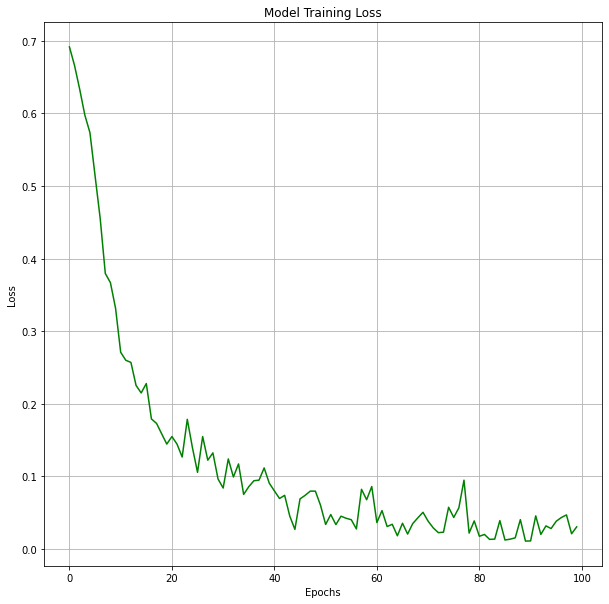

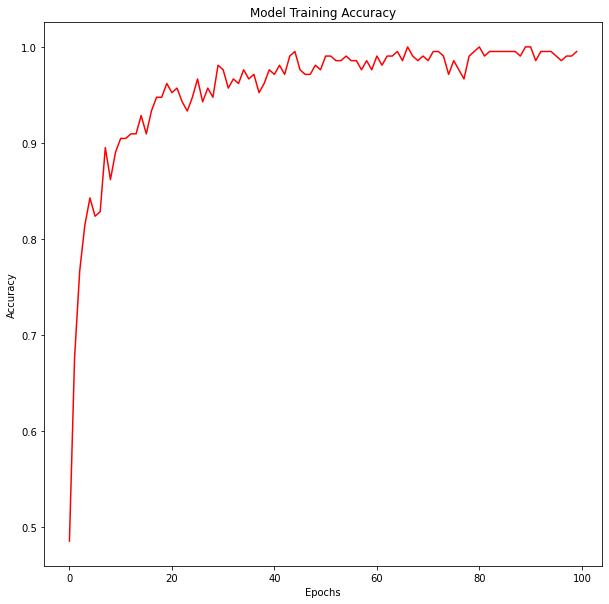

In [ ]:
#plotting loss and accuracy
plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Training Loss")
plt.plot(history_df['epoch'],history_df['loss'],color='green')
plt.grid()

plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Training Accuracy')
plt.plot(history_df['epoch'],history_df['accuracy'],color='red')
plt.show()

In [ ]:
#making predictions on test data
predictions=model.predict(test_data)
predictions[:10]

array([[9.9721396e-01],
       [1.4506280e-03],
       [9.9990129e-01],
       [4.9003731e-27],
       [6.6460776e-01],
       [9.9671859e-01],
       [9.9998784e-01],
       [4.8637718e-02],
       [1.8254970e-06],
       [9.9282968e-01]], dtype=float32)

In [ ]:
# test model on test data
testing= model.evaluate(test_data,test_labels)
testing

5/5 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.8794


[0.505700409412384, 0.8794326186180115]

In [ ]:
#making classification report
from sklearn.metrics import classification_report
model_classifiction_report=classification_report(test_labels,predictions.round(), output_dict=True)

In [ ]:
classification_report_df= pd.DataFrame(model_classifiction_report)
classification_report_df

,0,1,accuracy,macro avg,weighted avg
precision,0.788462,0.932584,0.879433,0.860523,0.884543
recall,0.872340,0.882979,0.879433,0.877660,0.879433
f1-score,0.828283,0.907104,0.879433,0.867693,0.880830
support,47.000000,94.000000,0.879433,141.000000,141.000000


In [ ]:
# testing loss and testing accuracy
print(f"Testing Loss: {testing[0]}")
print(f"Testing accuracy: {testing[1]}")

Testing Loss: 0.505700409412384
Testing accuracy: 0.8794326186180115


In [ ]:
# saving model
model.save('IonosphereModel.h5')